# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [3]:
#pip install pandas - console command in python, # for linux or mac users for console command in actual Python 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [26]:
df.head(-1)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
28608,2021-08-04,Virgin Islands,78,4691,39
28609,2021-08-04,Virginia,51,701059,11541
28610,2021-08-04,Washington,53,484702,6185
28611,2021-08-04,West Virginia,54,168330,2956


In [6]:
df.shape
#28614 is row in the data 
#5 is column 

(28614, 5)

In [7]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [8]:
ny_df = df[df['state']=='New York']

In [9]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [10]:
ny_df.shape
#522 rows of cases in NY 

(522, 5)

In [11]:
ny_df.tail()

,date,state,fips,cases,deaths
28372,2021-07-31,New York,36,2148445,53266
28427,2021-08-01,New York,36,2151035,53274
28482,2021-08-02,New York,36,2153243,53281
28537,2021-08-03,New York,36,2156305,53294
28592,2021-08-04,New York,36,2159139,53301


In [33]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']>=1] #use exclamation point to start point from people dying ! means NOT !=0 means nt equal to 0, or put >0 
first_ny_death.head()                       # 0 means dont count 0, count starting from 1 

#head means to start from beginning 

,date,state,fips,cases,deaths,new_cases
669,2020-03-14,New York,36,610,2,189
722,2020-03-15,New York,36,732,6,122
775,2020-03-16,New York,36,950,10,218
828,2020-03-17,New York,36,1375,18,425
882,2020-03-18,New York,36,2387,32,1012


In [13]:
#total number of cases
ny_df['cases'].max()

2159139

In [14]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

523100333

Finding new covid 19 cases on daily basis (new cases added everyday)

In [15]:
#new cases for NY
# type(ny_df['cases'])

newcase = [] #newcase is variable 
previuos_case = 0
for index, row in ny_df.iterrows(): #loop starts 
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case #set equal so that it keeps going to previous line, checking line by line to check for new data and calculate the difference
  newcase.append(newcase_count)
  # print(newcase_count)

In [16]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [18]:
ny_df['new_cases'].sum()
#can use sum because each number of cases diff but deaths cumulative 

2159139

In [19]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [20]:
type(ny_new_cases)

pandas.core.series.Series

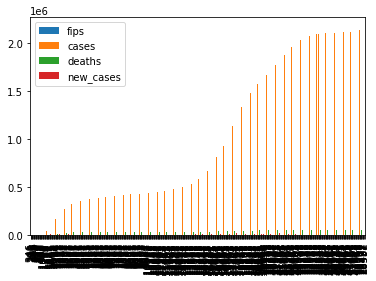

In [21]:
ny_df.plot(kind='bar')

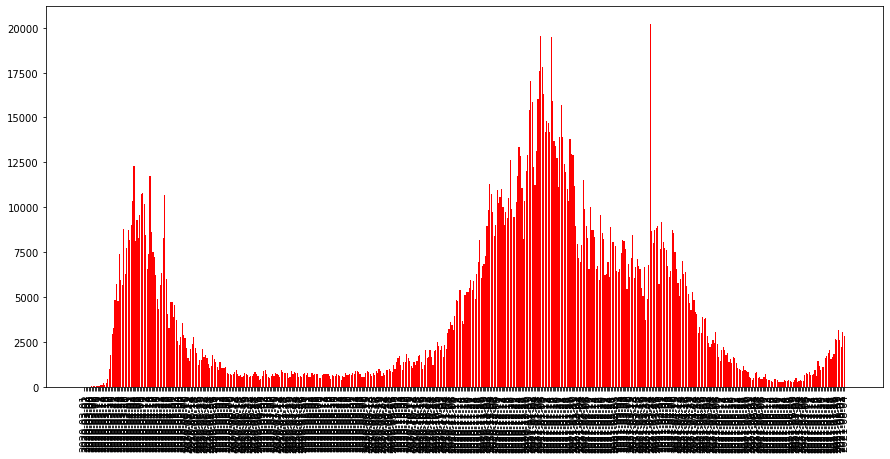

In [22]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1] #-1 shows last elements, range from last element to the 30th element
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

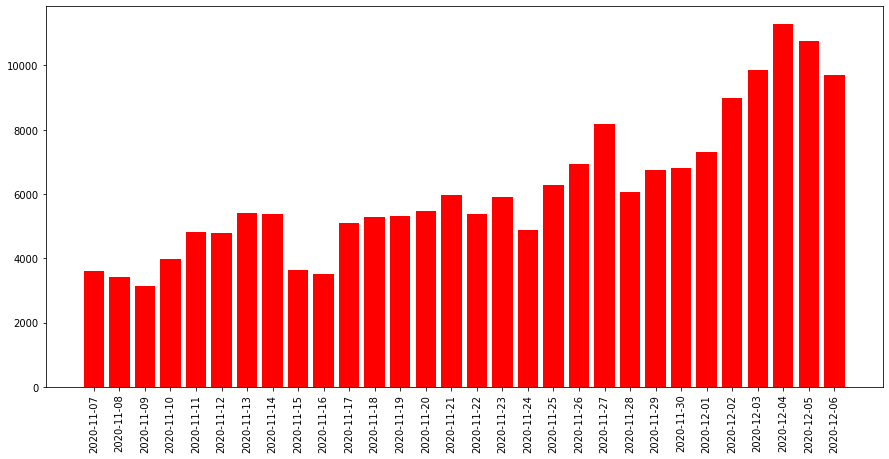

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

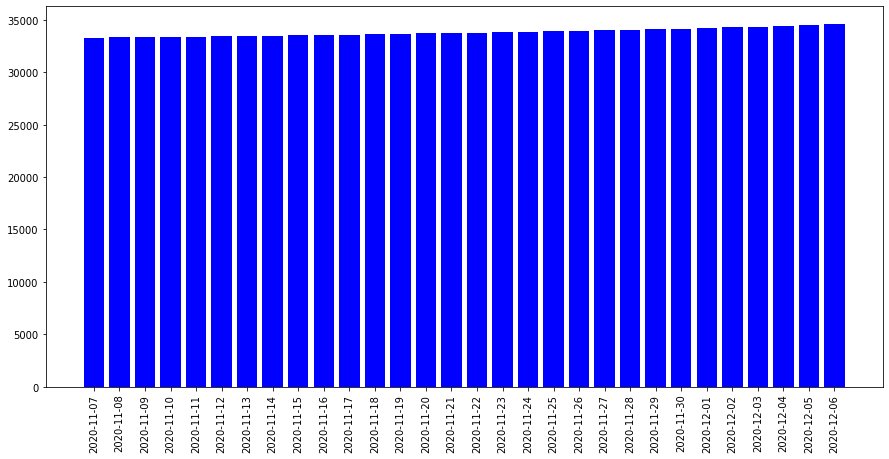

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

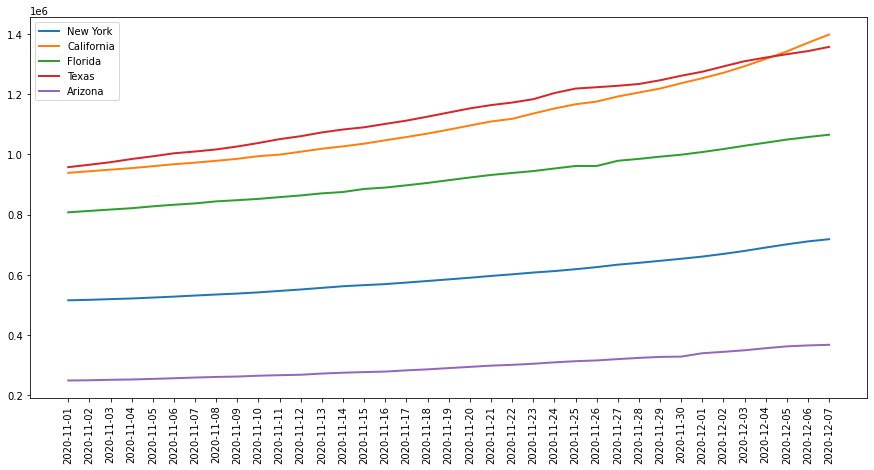

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1- 
    Based on the graphs, Washington was the first state that had records of people contacting COVID-19. The last date recorded is August 4th at Wisconsin. From the red bar graphs, I can tell that cases rise the most during the winter months and go down during the summer. Right now there's an increase again due to the Delta variant. Most of the cases, 80%, in NYS is due to the Delta variant. 
    
2.   Conclusion 2- 
    Regarding deaths, most deaths were reported to be greater than 30,000 around, 32,500 from November to December of last year. Based on the line graph of the five states above, I can see a small dip in the line for states such as Florida, Texas, and California. This is around November 26th, so during Thanksgiving there were more gatherings, people stayed at home more which might lead to less spreading. However, this is kind of contradictory since I read that most people contacted COVID-19 because of family members. 



In [ ]:
Conclusion 1:
state 
month 
summer 
winter rise 